In [20]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import os

In [92]:
directory = "../logs/May28_2024_Pf10-3/"

data = pd.DataFrame()

i = 0
for file in os.listdir(directory):
    if data.empty:
        data = pd.read_csv(directory + file)
        i += 1
        continue
    temp = pd.read_csv(directory + file)
    data = pd.merge(data, temp, on="TIdx", how = "left", suffixes = [i, i+1])
    i+= 1
    
data.head()


,TIdx,Pop1,n_fused1,n_parental1,n_resistant1,n_yellow1,n_green1,n_red1,fuseProb1,dieProb1,...,Pop10,n_fused10,n_parental10,n_resistant10,n_yellow10,n_green10,n_red10,fuseProb10,dieProb10,birthProb10
0,0.0,239.0,0.0,117.0,122.0,0.0,117.0,122.0,0.001,0.01,...,236.0,0.0,114.0,122.0,0.0,114.0,122.0,0.001,0.01,0.2
1,10.0,1335.0,4.0,664.0,667.0,0.0,666.0,669.0,0.001,0.01,...,1386.0,15.0,679.0,692.0,0.0,687.0,699.0,0.001,0.01,0.2
2,20.0,4915.0,82.0,2408.0,2425.0,3.0,2454.0,2458.0,0.001,0.01,...,5084.0,124.0,2419.0,2541.0,6.0,2475.0,2603.0,0.001,0.01,0.2
3,30.0,8595.0,229.0,4021.0,4345.0,17.0,4162.0,4416.0,0.001,0.01,...,8659.0,262.0,4120.0,4277.0,18.0,4228.0,4413.0,0.001,0.01,0.2
4,40.0,9789.0,339.0,4530.0,4920.0,26.0,4733.0,5030.0,0.001,0.01,...,9781.0,391.0,4590.0,4800.0,27.0,4760.0,4994.0,0.001,0.01,0.2


In [93]:
stat_data = pd.DataFrame()

stat_data["TIdx"] = data["TIdx"]
stat_data["mean_pop"] = data.filter(regex = "Pop").mean(axis=1)
stat_data["max_pop"] = data.filter(regex = "Pop").max(axis=1)
stat_data["min_pop"]= data.filter(regex = "Pop").min(axis=1)

stat_data["mean_fused"] = data.filter(regex= "n_fused").mean(axis=1)
stat_data["max_fused"] = data.filter(regex= "n_fused").max(axis=1)
stat_data["min_fused"] = data.filter(regex= "n_fused").min(axis=1)

stat_data["mean_parental"] = data.filter(regex= "n_parental").mean(axis=1)
stat_data["max_parental"] = data.filter(regex= "n_parental").max(axis=1)
stat_data["min_parental"] = data.filter(regex= "n_parental").min(axis=1)

stat_data["mean_resistant"] = data.filter(regex= "n_resistant").mean(axis=1)
stat_data["max_resistant"] = data.filter(regex= "n_resistant").max(axis=1)
stat_data["min_resistant"] = data.filter(regex= "n_resistant").min(axis=1)

stat_data["mean_yellow"] = data.filter(regex= "yellow").mean(axis=1)
stat_data["max_yellow"] = data.filter(regex= "yellow").max(axis=1)
stat_data["min_yellow"] = data.filter(regex= "yellow").min(axis=1)

stat_data["mean_green"] = data.filter(regex= "green").mean(axis=1)
stat_data["max_green"] = data.filter(regex= "green").max(axis=1)
stat_data["min_green"] = data.filter(regex= "green").min(axis=1)

stat_data["mean_red"] = data.filter(regex= "red").mean(axis=1)
stat_data["max_red"] = data.filter(regex= "red").max(axis=1)
stat_data["min_red"] = data.filter(regex= "red").min(axis=1)


stat_data["fuseProb"] = data.filter(regex= "fuseProb").mean(axis=1)
stat_data["dieProb"] = data.filter(regex= "dieProb").mean(axis=1)
stat_data["birthProb"] = data.filter(regex= "birthProb").mean(axis=1)
stat_data

,TIdx,mean_pop,max_pop,min_pop,mean_fused,max_fused,min_fused,mean_parental,max_parental,min_parental,...,min_yellow,mean_green,max_green,min_green,mean_red,max_red,min_red,fuseProb,dieProb,birthProb
0,0.0,238.9,246.0,235.0,0.0,0.0,0.0,118.5,124.0,114.0,...,0.0,118.5,124.0,114.0,120.4,124.0,115.0,0.001,0.01,0.2
1,10.0,1334.0,1428.0,1251.0,8.9,19.0,2.0,671.0,735.0,579.0,...,0.0,675.6,736.0,583.0,657.5,708.0,573.0,0.001,0.01,0.2
2,20.0,4877.9,5086.0,4643.0,91.6,131.0,46.0,2395.6,2485.0,2151.0,...,2.0,2446.2,2523.0,2200.0,2425.5,2603.0,2121.0,0.001,0.01,0.2
3,30.0,8429.7,8659.0,8083.0,255.2,313.0,168.0,4051.2,4275.0,3880.0,...,8.0,4185.1,4428.0,4022.0,4224.2,4504.0,3854.0,0.001,0.01,0.2
4,40.0,9699.8,9792.0,9573.0,399.8,512.0,275.0,4583.8,4955.0,4321.0,...,13.0,4784.0,5181.0,4492.0,4881.9,5249.0,4496.0,0.001,0.01,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9950.0,9942.4,9954.0,9928.0,9942.4,9954.0,9928.0,0.0,0.0,0.0,...,1517.0,3772.3,4211.0,3238.0,4113.8,4909.0,3251.0,0.001,0.01,0.2
996,9960.0,9936.9,9951.0,9923.0,9936.9,9951.0,9923.0,0.0,0.0,0.0,...,1510.0,3771.4,4201.0,3224.0,4114.2,4918.0,3227.0,0.001,0.01,0.2
997,9970.0,9938.7,9951.0,9931.0,9938.7,9951.0,9931.0,0.0,0.0,0.0,...,1537.0,3772.6,4217.0,3222.0,4111.6,4923.0,3216.0,0.001,0.01,0.2
998,9980.0,9941.5,9952.0,9934.0,9941.5,9952.0,9934.0,0.0,0.0,0.0,...,1524.0,3770.3,4219.0,3203.0,4110.8,4940.0,3223.0,0.001,0.01,0.2


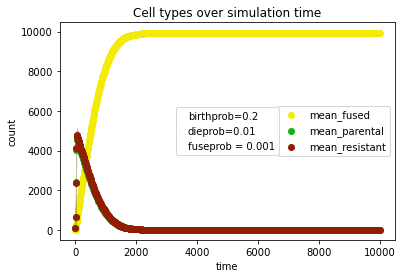

In [99]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.scatter(x="TIdx", y="mean_fused", data=stat_data, color="#F3EA05" ) # Plot some data on the axes.
ax.fill_between(x="TIdx", y1= "max_fused", y2="min_fused", data=stat_data, alpha=0.2, color="#F3EA05" )
ax.scatter(x="TIdx", y="mean_parental", data=stat_data, color="#16B119")
ax.fill_between(x="TIdx", y1= "max_parental", y2="min_parental", data=stat_data, alpha=0.2, color="#16B119")
ax.scatter(x="TIdx", y="mean_resistant", data=stat_data, color="#901E06")
ax.fill_between(x="TIdx", y1= "max_resistant", y2="min_resistant", data=stat_data, alpha=0.2, color="#901E06")
legend1 = plt.legend()
plt.legend({"fuseprob = 0.001", "dieprob=0.01", "birthprob=0.2"}, handlelength=0, handleheight=0, markerscale=0, loc = "center")
plt.gca().add_artist(legend1)
plt.title("Cell types over simulation time")
plt.xlabel("time")
plt.ylabel("count")
plt.savefig("FusionModel_Pf10-3_May28" + "_types" + ".png") #changing naming convention to refer to model run rather than time I ran the plot generation

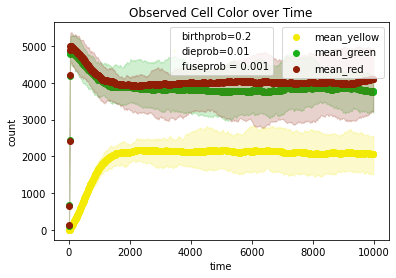

In [98]:
fig2, ax2 = plt.subplots()  # Create a figure containing a single axes.
ax2.scatter(x="TIdx", y="mean_yellow", data=stat_data, color="#F3EA05" ) # Plot some data on the axes.
ax2.fill_between(x="TIdx", y1= "max_yellow", y2="min_yellow", data=stat_data, alpha=0.2, color="#F3EA05")
ax2.scatter(x="TIdx", y="mean_green", data=stat_data, color="#16B119")
ax2.fill_between(x="TIdx", y1= "max_green", y2="min_green", data=stat_data, alpha=0.2,color="#16B119")
ax2.scatter(x="TIdx", y="mean_red", data=stat_data, color="#901E06")
ax2.fill_between(x="TIdx", y1= "max_red", y2="min_red", data=stat_data, alpha=0.2, color="#901E06")
legend1 = plt.legend()
#plt.legend({"fuseprob = 0.001", "dieprob=0.01", "birthprob=0.2"}, loc = "lower center", markerscale=0)
plt.legend({"fuseprob = 0.001", "dieprob=0.01", "birthprob=0.2"}, handlelength=0, handleheight=0, markerscale=0, loc = "upper center")
plt.gca().add_artist(legend1)
plt.title("Observed Cell Color over Time")
plt.xlabel("time")
plt.ylabel("count")
plt.savefig("FusionModel_Pf10-3_May28" + "_colors" + ".png")